<a href="https://colab.research.google.com/github/mohitmathurtech/colab_hf_LR_ML_DL/blob/main/Linear_Regression_(Pyhton_Handson_for_ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression


We will start with the simplest form of linear regression model (i.e., fitting a straight line to data).
A straight-line fit is a model of the form:
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.


## Example 1: Consider the data, which is scattered about a line with a slope of 2 and an intercept of –5:

We begin with the standard imports:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style
sns.set(style="whitegrid")

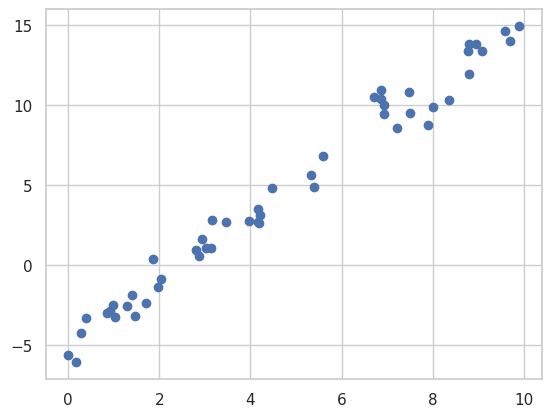

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, as shown in the following figure:

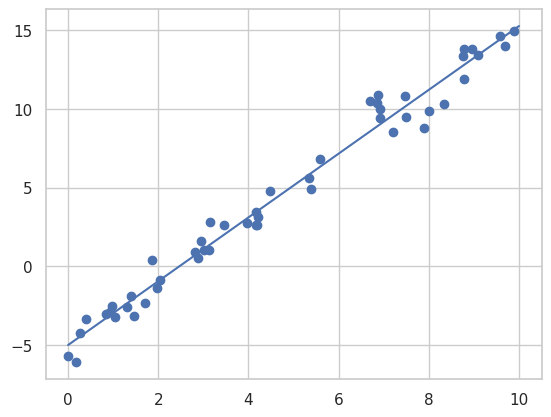

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are `coef_` and `intercept_`:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


We see that the results are very close to the values used to generate the data, as we might hope.

## Example 2:  predict the scores based on the number of hours.

In [ ]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Read Data
import pandas as pd
stu=pd.read_csv('student_scores.csv')
stu.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


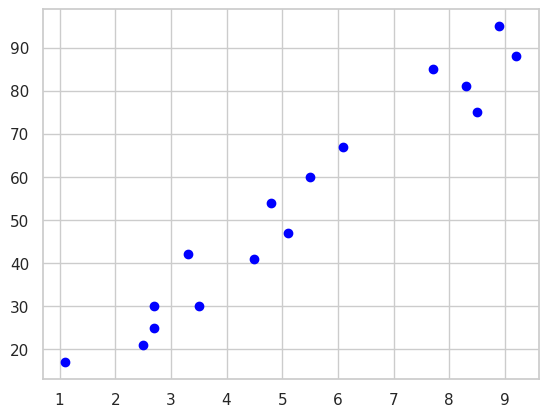

In [ ]:
# Get X & Y variables
X = stu.iloc[:,[0]].values
Y = stu.iloc[:,[-1]].values

#Split Data s.t. test_size of 1/3 and train size of 2/3 from OG Dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3)

#print("X_train:  ",X_train)
#print("X_test:  ",X_test)


# Plot Train DataSet
plt.scatter(X_train,Y_train,color="blue")

In [ ]:
#Init Linear Regression Model & Fit model
mark = LinearRegression()
mark.fit(X_train,Y_train)

LinearRegression()

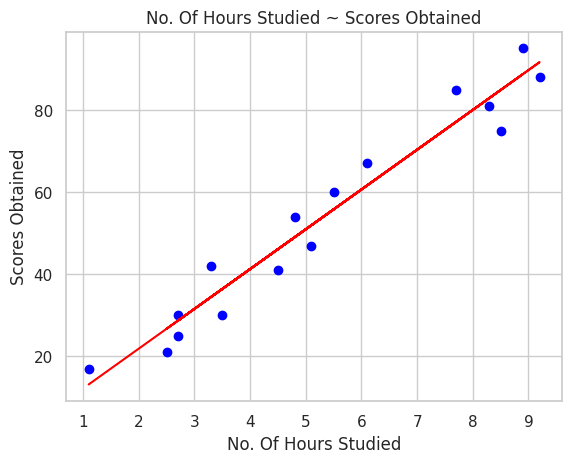

In [ ]:
# fit model on Train DataSet
plt.scatter(X_train,Y_train,color="blue")
plt.plot(X_train,mark.predict(X_train),color='red')
plt.title("No. Of Hours Studied ~ Scores Obtained")
plt.xlabel("No. Of Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

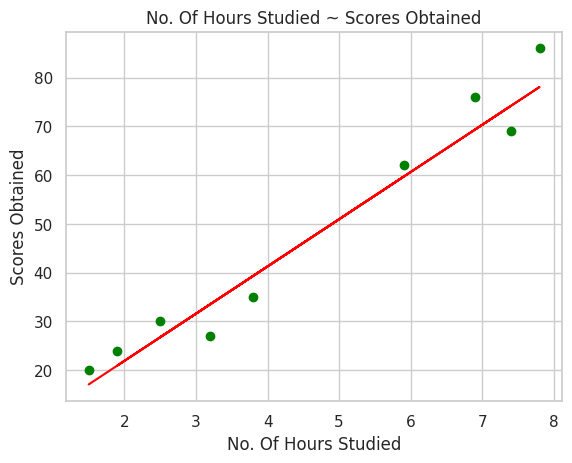

In [ ]:
# fit model on Test Dataset
plt.scatter(X_test,Y_test,color="green")
plt.plot(X_test,mark.predict(X_test),color='red')
plt.title("No. Of Hours Studied ~ Scores Obtained")
plt.xlabel("No. Of Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

In [ ]:
y_pred = mark.predict(X_test)

print("Model slope:    ", mark.coef_[0])
print("Model intercept:", mark.intercept_)


Model slope:     [9.69062469]
Model intercept: [2.50695476]


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  4.691397441397446
Mean Squared Error:  25.463280738222593
Root Mean Squared Error:  5.046115410711748


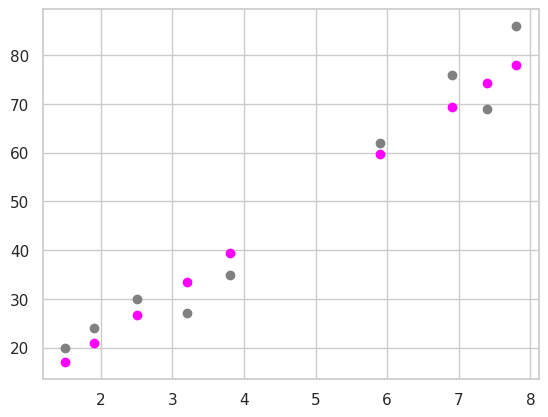

In [ ]:
plt.scatter(X_test, Y_test, color = "gray")
plt.scatter(X_test, y_pred, color = "magenta")
plt.show()

In [ ]:
compare = pd.DataFrame({"No. Of Hours":X_test.flatten(),"Actual Score":Y_test.flatten(), "Predicted Score":y_pred.flatten()})
compare

,No. Of Hours,Actual Score,Predicted Score
0,1.5,20,17.042892
1,3.2,27,33.516954
2,7.4,69,74.217577
3,2.5,30,26.733516
4,5.9,62,59.681640
5,3.8,35,39.331329
6,1.9,24,20.919142
7,7.8,86,78.093827
8,6.9,76,69.372265


In [ ]:
X_test2= stu.iloc[2:4,[0]].values
print("X_test2:  ",X_test2)

Y_test2= stu.iloc[2:4,[-1]].values
print("Y_test2:  ",Y_test2)

X_test2:   [[3.2]
 [8.5]]
Y_test2:   [[27]
 [75]]


In [ ]:
y_pred2 = mark.predict(X_test2)

print("y_pred2:  ",y_pred2)

y_pred2:   [[33.51695377]
 [84.87726463]]
